<a href="https://colab.research.google.com/github/indiyanti/emotion-recognition/blob/main/SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d 'uwrfkaggler/ravdess-emotional-speech-audio'

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 99% 426M/429M [00:05<00:00, 107MB/s] 
100% 429M/429M [00:05<00:00, 77.7MB/s]


In [7]:
import zipfile

# Ganti 'nama_file.zip' dengan nama file ZIP yang ingin Anda ekstrak
nama_file_zip = 'ravdess-emotional-speech-audio.zip'

# Buka file ZIP
with zipfile.ZipFile('ravdess-emotional-speech-audio.zip', 'r') as dataset_zip:
    # Ekstrak semua file ke direktori saat ini
    dataset_zip.extractall()

# Tutup file ZIP
dataset_zip.close()


In [13]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

In [14]:
def extract_mfcc(wav_file_name):
  y, sr = librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axix=0)

  return mfcss

In [17]:
import os
import librosa
import numpy as np
from keras.utils import to_categorical  # Import to_categorical function from keras.utils

# Define extract_mfcc function
def extract_mfcc(wav_file_name):
    try:
        y, sr = librosa.load(wav_file_name, sr=None)  # Load audio file
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # Compute MFCCs
        mfccs_mean = np.mean(mfccs.T, axis=0)  # Take the mean of MFCCs along axis 0
    except Exception as e:
        print(f"Error encountered while processing {wav_file_name}: {e}")
        return None

    return mfccs_mean

# Initialize empty lists
ravdess_speech_labels = []
ravdess_speech_data = []

# Replace '/content/ravdess-emotional-speech-audio' with your actual directory path
directory_path = '/content/ravdess-emotional-speech-audio'

# Iterate through the directory
for subdir, dirs, files in os.walk(directory_path):
    for filename in files:
        if filename.endswith('.wav'):  # Process only .wav files
            wav_file_path = os.path.join(subdir, filename)
            label = int(filename[7:8]) - 1  # Extract emotion label (assuming filename format is consistent)

            # Extract MFCC features
            mfcc_features = extract_mfcc(wav_file_path)

            if mfcc_features is not None:
                ravdess_speech_labels.append(label)
                ravdess_speech_data.append(mfcc_features)

# Convert lists to numpy arrays
ravdess_speech_data_array = np.array(ravdess_speech_data)
ravdess_speech_label_array = np.array(ravdess_speech_labels)

# Convert labels to categorical using to_categorical function
labels_categorical = to_categorical(ravdess_speech_label_array)

# Print the shapes for verification
print("Shape of speech data array:", ravdess_speech_data_array.shape)
print("Shape of speech label array:", ravdess_speech_label_array.shape)
print("Shape of categorical labels:", labels_categorical.shape)

print("Finish Loading the Dataset")

Shape of speech data array: (1440, 40)
Shape of speech label array: (1440,)
Shape of categorical labels: (1440, 8)
Finish Loading the Dataset


In [18]:
ravdess_speech_data

[array([-5.9700537e+02,  6.1306602e+01,  3.7224646e+00,  1.8924969e+01,
        -8.1007636e-01,  8.8816509e+00, -5.6663995e+00,  4.2649512e+00,
        -3.2671347e+00, -4.8616452e+00, -5.9938531e+00, -5.1107502e+00,
        -4.0681047e+00,  1.0898854e+00, -3.6797497e+00, -1.6648059e+00,
        -3.0146358e+00,  3.5537395e-01,  1.3330168e+00, -4.2795162e+00,
        -2.0843949e+00, -2.3627748e+00, -3.2948732e+00, -1.9757828e-01,
        -2.8560836e+00, -4.9859061e+00, -2.4946513e+00, -1.9038202e+00,
        -3.7196791e+00, -2.5926774e+00, -4.2040968e+00, -5.2267468e-01,
        -4.1464047e+00, -2.3621230e+00, -1.3256301e+00, -2.5718102e+00,
        -7.4256128e-01,  1.4228734e-01, -1.5319883e+00,  1.4924685e+00],
       dtype=float32),
 array([-6.06977661e+02,  7.39634781e+01,  6.36073589e+00,  2.71919155e+01,
         3.85894012e+00,  1.68371334e+01, -4.19228411e+00,  1.06532030e+01,
        -5.45139194e-01,  1.30813026e+00, -3.62244582e+00,  1.28639889e+00,
         5.44576740e+00,  7.

In [19]:
##convert data and labell to array
ravdess_speech_data_array = np.array(ravdess_speech_data)
ravdess_speech_label_array = np.array(ravdess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical = to_categorical(ravdess_speech_label_array)
labels_categorical.shape

(1440, 8)

In [20]:
ravdess_speech_data_array

array([[-5.9700537e+02,  6.1306602e+01,  3.7224646e+00, ...,
         1.4228734e-01, -1.5319883e+00,  1.4924685e+00],
       [-6.0697766e+02,  7.3963478e+01,  6.3607359e+00, ...,
         1.4431033e-01, -7.8841531e-01,  1.3938687e+00],
       [-5.7080414e+02,  6.4996269e+01,  2.8052137e+00, ...,
        -1.8068095e-01, -1.5222213e-01,  5.7993531e-01],
       ...,
       [-6.1526678e+02,  6.8453636e+01,  3.2453578e+00, ...,
        -1.8888482e+00, -6.1917108e-01,  3.4666687e-01],
       [-6.3366455e+02,  5.8254837e+01, -1.0960315e+00, ...,
         1.1448088e+00,  5.5219072e-01,  9.2414731e-01],
       [-8.1811243e+02,  6.9373833e+01,  1.1634333e+01, ...,
         8.8268584e-01, -8.7777846e-02, -5.0376225e-01]], dtype=float32)

In [21]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [22]:
number_of_samples = ravdess_speech_data_array.shape[0]
training_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [23]:
def create_model_LSTM():
  model = Sequential()
  model.add(LSTM(128, return_sequences=False, input_shape=(40,1)))
  model.add(Dense(64))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model

In [24]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [25]:
w.shape

(1152, 40, 1)

In [26]:
model_A = create_model_LSTM()

# Assuming ravdess_speech_data_array and labels_categorical are numpy arrays containing your data
# Replace training_samples and validation_samples with actual values
history = model_A.fit(
    np.expand_dims(ravdess_speech_data_array[:training_samples], -1),
    labels_categorical[:training_samples],
    validation_data=(
        np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1),
        labels_categorical[training_samples:training_samples+validation_samples]
    ),
    epochs=130,
    shuffle=True
)

Epoch 1/130
36/36 [==============================] - 8s 124ms/step - loss: 2.0608 - accuracy: 0.1458 - val_loss: 2.0103 - val_accuracy: 0.2431
Epoch 2/130
36/36 [==============================] - 2s 47ms/step - loss: 2.0234 - accuracy: 0.1832 - val_loss: 1.9635 - val_accuracy: 0.2500
Epoch 3/130
36/36 [==============================] - 2s 49ms/step - loss: 1.9913 - accuracy: 0.2135 - val_loss: 1.9274 - val_accuracy: 0.2569
Epoch 4/130
36/36 [==============================] - 3s 73ms/step - loss: 1.9794 - accuracy: 0.2309 - val_loss: 1.9069 - val_accuracy: 0.2431
Epoch 5/130
36/36 [==============================] - 2s 66ms/step - loss: 1.9654 - accuracy: 0.2214 - val_loss: 1.8669 - val_accuracy: 0.3472
Epoch 6/130
36/36 [==============================] - 2s 57ms/step - loss: 1.9404 - accuracy: 0.2326 - val_loss: 1.8577 - val_accuracy: 0.3264
Epoch 7/130
36/36 [==============================] - 3s 93ms/step - loss: 1.9068 - accuracy: 0.2439 - val_loss: 1.8369 - val_accuracy: 0.3264
Epoch

<function matplotlib.pyplot.show(close=None, block=None)>

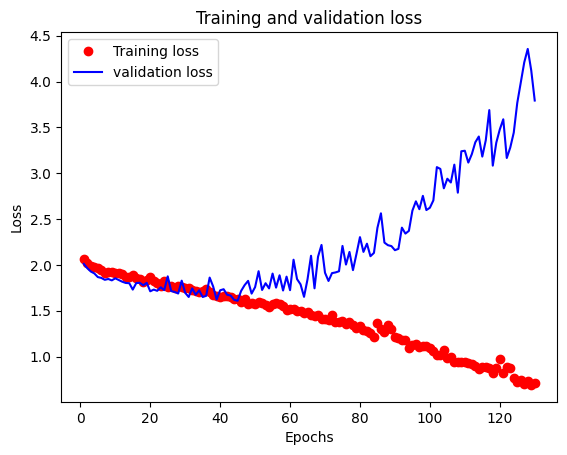

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

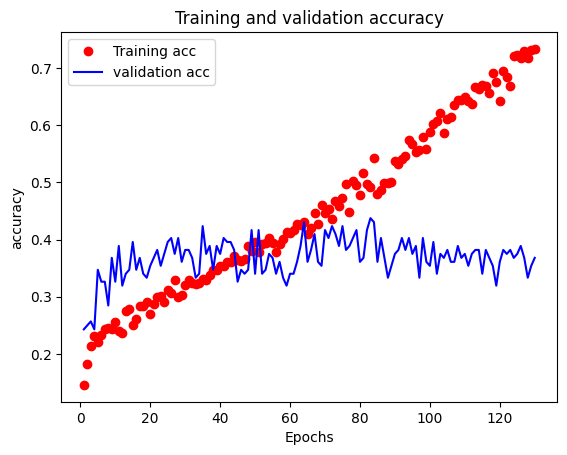

In [28]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show

In [29]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

5/5 [==============================] - 0s 40ms/step - loss: 3.1979 - accuracy: 0.3125


[3.197941541671753, 0.3125]

In [30]:
import numpy as np
import librosa

# Define the emotion labels
emotions = ["Neutral", "Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"]

def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name, sr=None)  # Load audio file
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

def predict(wav_filepath):
    # Extract MFCC features
    test_point = extract_mfcc(wav_filepath)

    # Reshape the MFCC features for the model
    test_point = np.reshape(test_point, newshape=(1, 40, 1))

    # Predict the emotion
    prediction = model_A.predict(test_point)

    # Print the predicted emotion
    print(emotions[np.argmax(prediction[0])])

# Example usage:
predict('/content/Actor_19/03-01-01-01-01-01-19.wav')


1/1 [==============================] - 1s 804ms/step
Sad


In [31]:
predict('/content/Actor_19/03-01-01-01-01-01-19.wav')

1/1 [==============================] - 0s 38ms/step
Sad


In [32]:
predict('/content/Actor_05/03-01-08-01-02-01-05.wav')

1/1 [==============================] - 0s 80ms/step
Surprised


In [33]:
predict('/content/Actor_03/03-01-04-02-01-02-03.wav')

1/1 [==============================] - 0s 52ms/step
Sad


In [34]:
predict('/content/Actor_22/03-01-03-01-01-02-22.wav')

1/1 [==============================] - 0s 76ms/step
Angry


In [35]:
predict('/content/Actor_03/03-01-06-01-02-02-03.wav')

1/1 [==============================] - 0s 38ms/step
Fearful


In [36]:
predict('/content/Actor_03/03-01-07-02-02-01-03.wav')

1/1 [==============================] - 0s 40ms/step
Disgust


In [37]:
predict('/content/Actor_03/03-01-08-01-01-02-03.wav')

1/1 [==============================] - 0s 64ms/step
Neutral


In [38]:
model_A.save('mymodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
import tensorflow as tf

modelc=tf.keras.models.load_model('mymodel.h5')